Datasets can be downloaded [here](https://www.dropbox.com/sh/gfnwpt9kn3l2rar/AADPZ9bjVNy9LOnXsver8Ygqa?dl=0)


Ref: Buenrostro, J.D. et al. Integrated Single-Cell Analysis Maps the Continuous Regulatory Landscape of Human Hematopoietic Differentiation. Cell (2018).

In [2]:
import stream as st
st.__version__

'1.0'

In [3]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

For scATAC-seq analysis, STREAM can take as input a feature matrix, 

- k-mer feature matrix
- motif feature matrix

More details can be found https://github.com/pinellolab/STREAM_atac

In [4]:
adata = st.read(file_name='./zscores_scaled.tsv.gz',workdir='./k-mer_result')

Saving results in: ./k-mer_result


To get the **zscore file**, 

User can run the following codes within Jupyter Notebook (**Step[4] can be skipped**):
> Using k-mers as features:
```python
import stream_atac  
adata = stream_atac.preprocess_atac(file_count='./count_file.tsv.gz',file_region='./region_file.bed.gz',file_sample='./sample_file.tsv.gz',genome = 'hg19')
```

> Using motifs as features:
```python
import stream_atac  
adata = stream_atac.preprocess_atac(file_count='./count_file.tsv.gz',file_region='./region_file.bed.gz',file_sample='./sample_file.tsv.gz',genome = 'hg19',feature='motif')
```

or user can run the following codes in Terminal:
> Using k-mers as features:  
`stream_atac -c count_file.tsv.gz -s sample_file.tsv.gz -r region_file.bed.gz -g hg19`

> Using motifs as features:  
`stream_atac -c count_file.tsv.gz -s sample_file.tsv.gz -r region_file.bed.gz -g hg19 -f motif`

To load and use 10x Genomics single cell ATAC-seq data processed with Cell Ranger:

```python
import stream_atac
adata = stream_atac.preprocess_atac(file_count='./filtered_peak_bc_matrix/matrix.mtx',
                                    file_sample='./filtered_peak_bc_matrix/barcodes.tsv',
                                    file_region='./filtered_peak_bc_matrix/peaks.bed',
                                    genome = 'hg19',feature='motif',file_format='mtx')
```

In [5]:
st.add_cell_labels(adata,file_name='./cell_label.tsv.gz')
st.add_cell_colors(adata,file_name='./cell_label_color.tsv.gz')

using all the features ...
15 PCs are selected


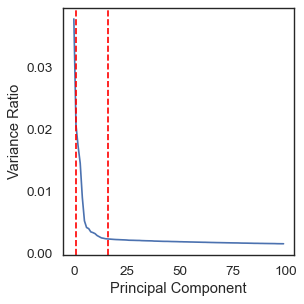

In [6]:
st.select_top_principal_components(adata,first_pc=False,n_pc=15)

In [7]:
st.dimension_reduction(adata,method='se',feature='top_pcs',n_components=3,n_neighbors=15,n_jobs=4)

feature top_pcs is being used ...
4 cpus are being used ...


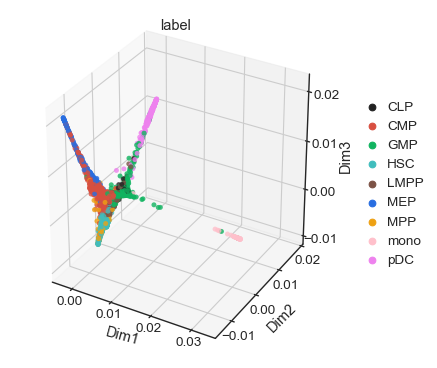

In [8]:
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=False,show_text=False,plotly=False)

In [10]:
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=False,show_text=False,plotly=True)

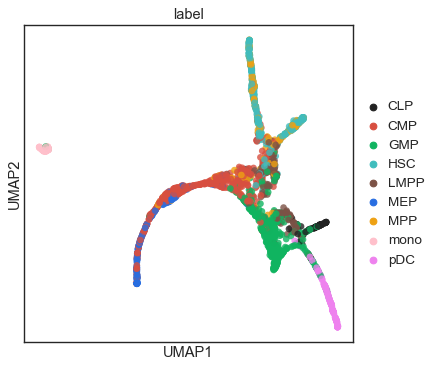

In [11]:
st.plot_visualization_2D(adata,n_neighbors=100,color=['label'],use_precomputed=False)

#### Trajectory inference

* By default, trajectories will be inferred in **the manifold learnt from the step of dimension reduction `st.dimension_reduction()`**


* But it can be also learned directly on **2D visualization plot from `st.plot_visualization_2D()`** by setting `use_vis=True` in st.seed_elastic_principal_graph(). An example can be found [here](https://nbviewer.jupyter.org/github/pinellolab/STREAM/blob/master/tutorial/1.2.use_vis.ipynb)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 5


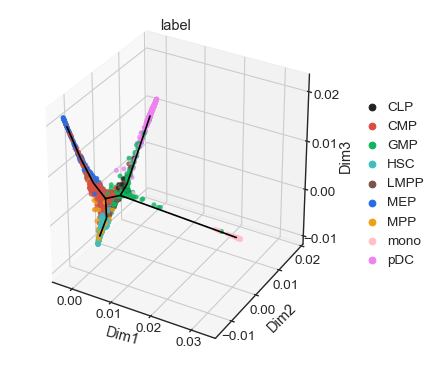

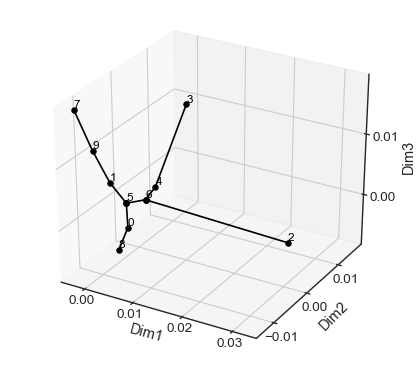

In [12]:
st.seed_elastic_principal_graph(adata,n_clusters=10)
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

**`epg_alpha`, `epg_mu`, `epg_lambda` are the three most influential parameters for learning elastic principal graph.**  
- `epg_alpha`: penalizes spurious branching events. **The larger, the fewer branches the function will learn**. (by default, `epg_alpha=0.02`)
- `epg_mu`: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. **The larger, the more edges the function will use to fit into points(cells)** (by default, `epg_mu=0.1`) 
- `epg_lambda`: penalizes the total length of edges. **The larger, the 'shorter' curves the function will use to fit into points(cells)** and the fewer points(cells) the curves will reach. (by default, `epg_lambda=0.02`)

> **'epg_trimmingradius'** can help get rid of noisy points (by defalut `epg_trimmingradius=Inf`)   
e.g. `st.elastic_principal_graph(adata,epg_trimmingradius=0.1)`  

In [13]:
st.elastic_principal_graph(adata,epg_alpha=0.01,epg_mu=0.1,epg_lambda=0.01)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 2034 points and 3 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

3||50
	
2.914e-06
	
50
	
49
	
42
	
3
	
0
	
0
	
9.366e-07
	
7.462e-07
	
0.9911
	
0.9929
	
1.704e-06
	
2.727e-07
	
1.364e-05
	
0.0006818
	
0


12.146 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 7


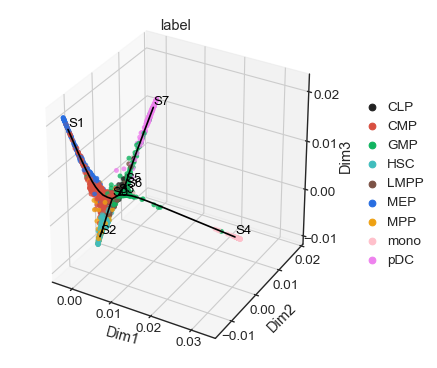

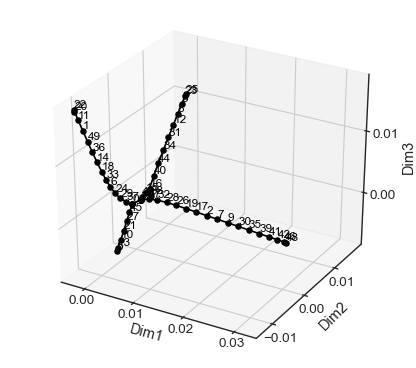

In [14]:
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=True,show_text=True,plotly=False)
st.plot_branches(adata,show_text=True)

Collasping small branches ...
[1]
 "Removing the bridge branch with nodes: 1 5"


[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 49 nodes on 2034 points and 3 dimensions"


[1]
 "Using a single core"


0.012 sec elapsed

Number of branches after pruning ElPiGraph: 6


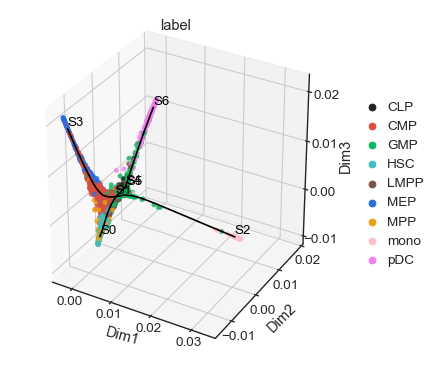

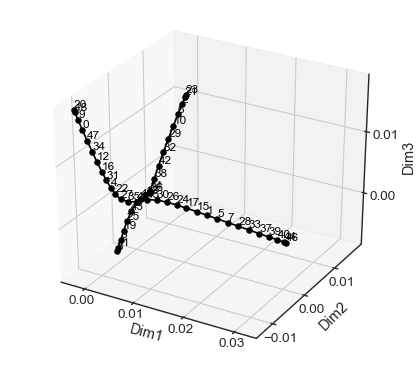

In [15]:
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesLength',epg_collapse_par=0.0017)
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 6


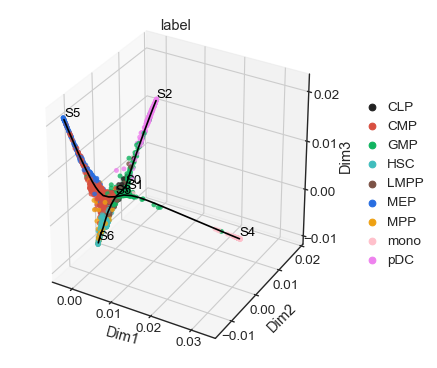

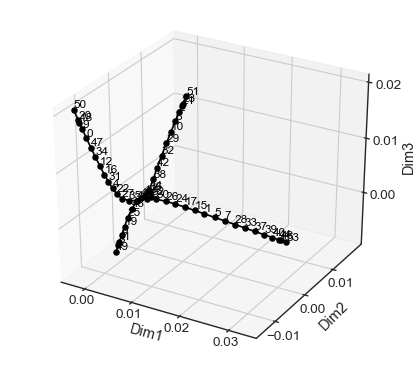

In [16]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=True,show_text=True)
st.plot_branches(adata,show_text=True)

In [17]:
st.plot_dimension_reduction(adata,color=['label'],n_components=3,show_graph=True,show_text=True,plotly=True)

Importing precomputed umap visualization ...


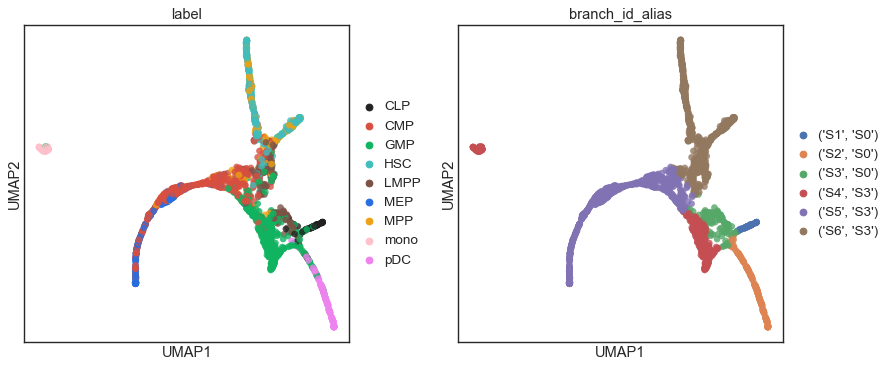

In [18]:
st.plot_visualization_2D(adata,n_neighbors=30,color=['label','branch_id_alias'],fig_ncol=4)

#### Trajectory visualization

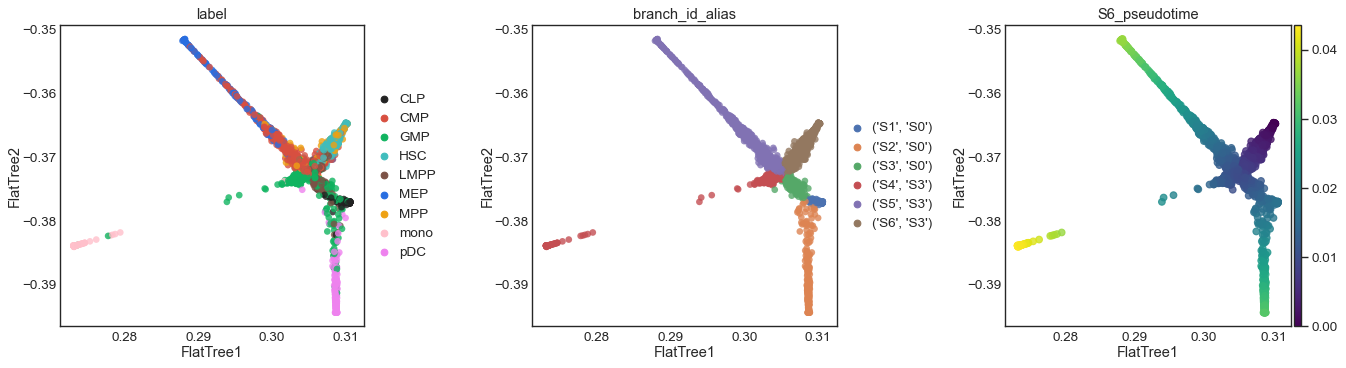

In [20]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S6_pseudotime'],
                  dist_scale=0.5,show_graph=False,show_text=False)

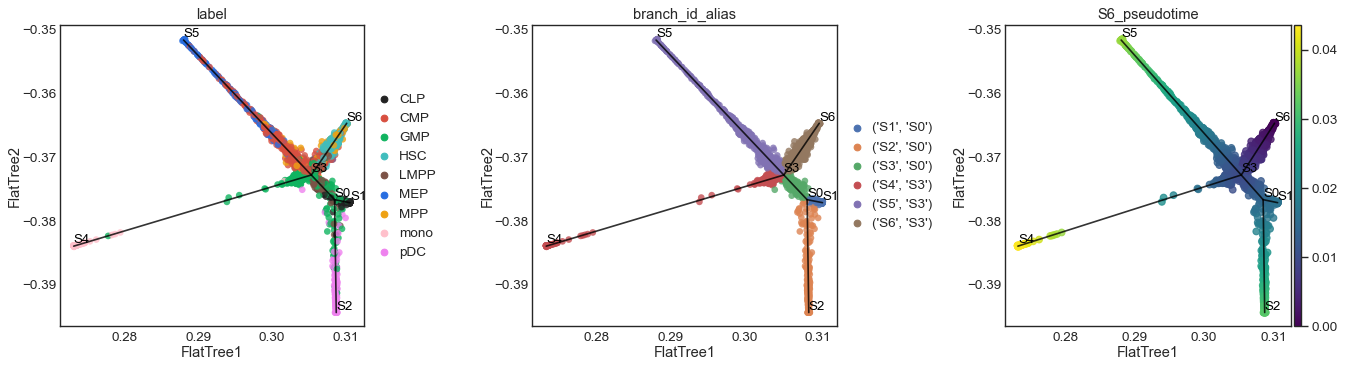

In [21]:
st.plot_flat_tree(adata,color=['label','branch_id_alias','S6_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

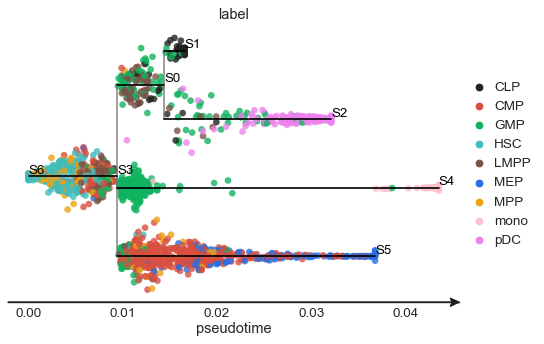

In [22]:
st.plot_stream_sc(adata,root='S6',color=['label'],
                  dist_scale=0.5,show_graph=True,show_text=True)

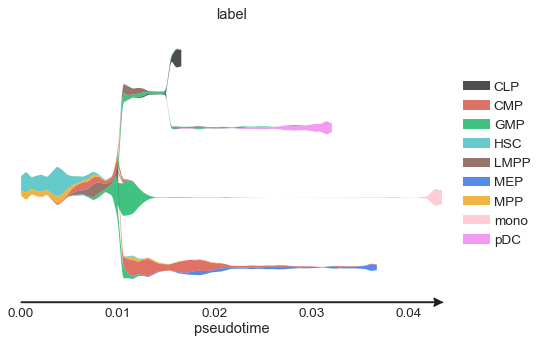

In [23]:
st.plot_stream(adata,root='S6',color=['label'])

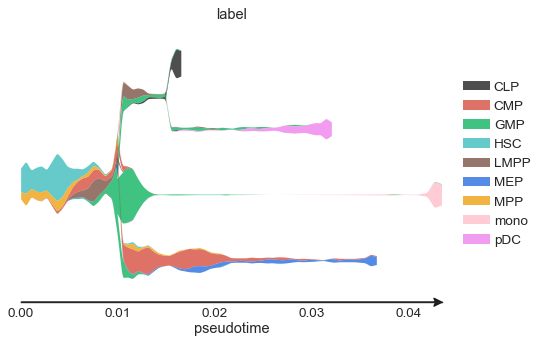

In [24]:
st.plot_stream(adata,root='S6',color=['label'],dist_scale=1.5)

#### Marker kmers detection

In [25]:
st.detect_leaf_markers(adata,cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S6',n_jobs=4)

Scanning all features ...
Filtering out markers that are expressed in less than 5 cells ...
4 cpus are being used ...
8192 markers are being scanned ...


In [27]:
adata.uns['leaf_markers_all'].head()

zscore H_statistic      H_pvalue   S6S3_pvalue   S0S1_pvalue  \
AGATAAG  1.81216     1265.13  1.21111e-272  1.66112e-101  3.17498e-131   
CCTTATC   1.8103     1184.86  3.04645e-255   3.15807e-96   1.6589e-101   
GATAAGA  1.81305     1179.24  5.04748e-254    3.1146e-92  9.05877e-115   
GAGATAA  1.89355     1154.39  1.22707e-248  3.49925e-116   1.04615e-93   
CTTATCA  1.81155     1140.07  1.56217e-245   9.35943e-83   5.1399e-101   

          S0S2_pvalue   S3S4_pvalue S3S5_pvalue  
AGATAAG  1.95844e-295             0           1  
CCTTATC  6.26506e-275   4.6122e-304           1  
GATAAGA  1.11699e-250  3.23293e-312           1  
GAGATAA  1.91752e-259  2.14259e-296           1  
CTTATCA  9.60022e-242  8.59532e-290           1

In [28]:
adata.uns['leaf_markers'][('S3','S4')].head()

zscore H_statistic      H_pvalue   S6S3_pvalue  S0S1_pvalue  \
ACTTCCC  1.46302     670.683  7.75886e-144  6.34214e-107  1.42115e-43   
ATTGCAC  1.87664     661.653  6.99449e-142  1.22075e-174  7.43104e-43   
AAGAGGA  1.33382     658.364    3.605e-141   1.1643e-114  1.48986e-17   
GATTGCA    1.884      604.53  1.62115e-129  1.83841e-146  2.37459e-53   
TGTGCAA  1.95852     585.684  1.94324e-125  3.55562e-147  3.03193e-37   

         S0S2_pvalue S3S4_pvalue   S3S5_pvalue  
ACTTCCC  0.000270923           1  1.10217e-143  
ATTGCAC  1.42148e-42           1    1.3303e-93  
AAGAGGA     0.008568           1  3.00884e-132  
GATTGCA  3.16504e-74           1   6.07452e-75  
TGTGCAA  1.78964e-59           1   8.32007e-94

In [30]:
adata.uns['leaf_markers'][('S6','S3')].head()

zscore H_statistic      H_pvalue S6S3_pvalue  S0S1_pvalue  \
ATAAATC   1.8704     967.103  4.80468e-208           1  1.26591e-40   
TAAATCA  1.92714     881.129  2.04266e-189           1  1.01318e-35   
ATTTATG    1.857     760.362  2.95556e-163           1  3.19861e-37   
AAGGAAA  1.38439      664.58  1.62576e-142           1   0.00440891   
AATTTAT  1.64035     627.541  1.69505e-134           1  3.36623e-18   

          S0S2_pvalue   S3S4_pvalue   S3S5_pvalue  
ATAAATC  8.13881e-117  2.80826e-260  9.16759e-162  
TAAATCA    3.926e-107  1.74911e-211  1.50771e-162  
ATTTATG   9.61203e-93  2.25826e-181   4.17478e-95  
AAGGAAA  3.68742e-123   3.05084e-80  4.21082e-116  
AATTTAT  4.53817e-108  8.63678e-121   3.29078e-47

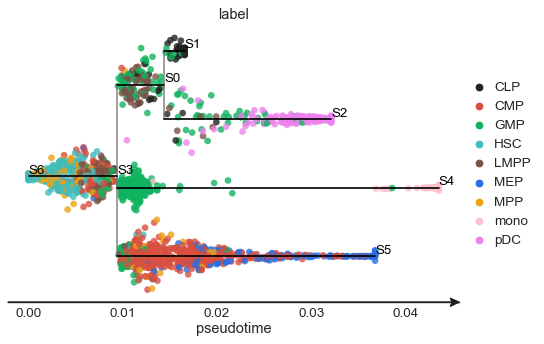

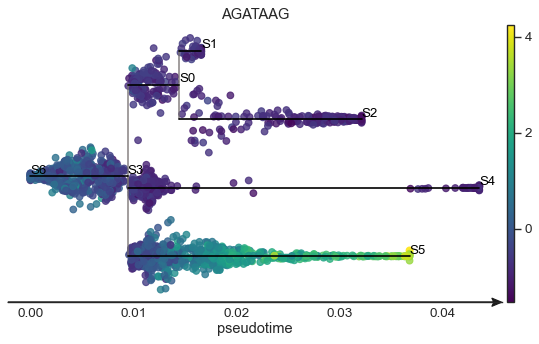

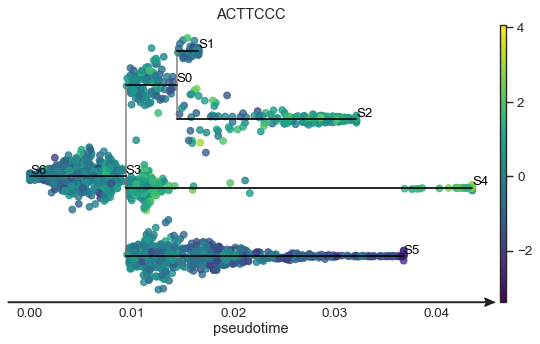

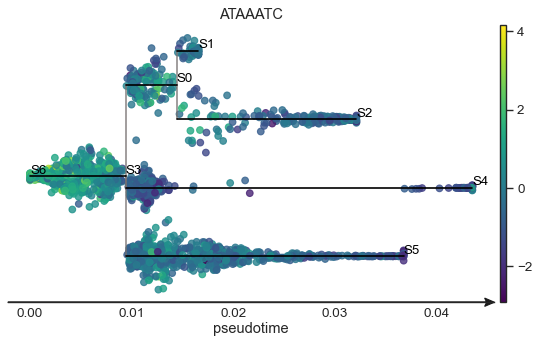

In [31]:
st.plot_stream_sc(adata,root='S6',color=['label','AGATAAG','ACTTCCC','ATAAATC'],
                  dist_scale=0.5,show_graph=True,show_text=True)

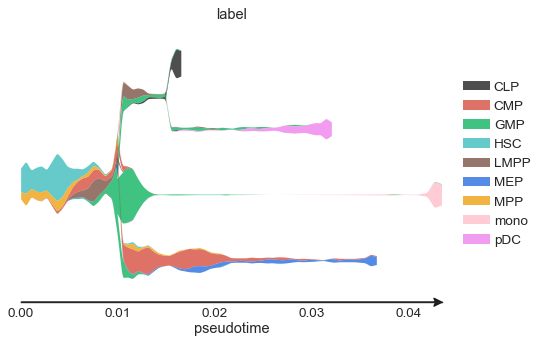

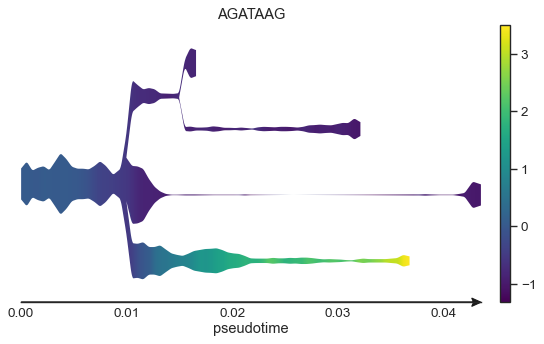

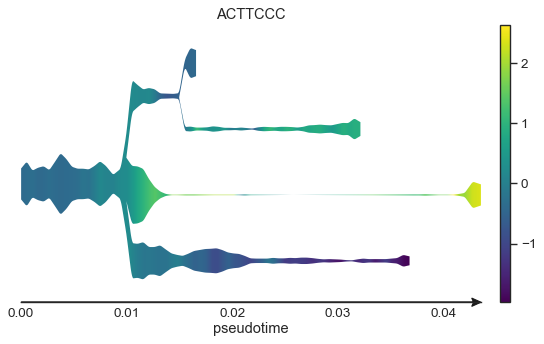

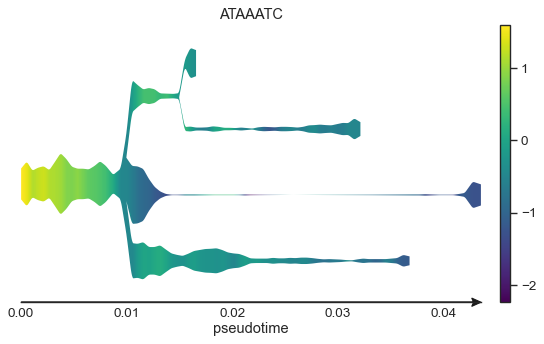

In [32]:
st.plot_stream(adata,root='S6',color=['label','AGATAAG','ACTTCCC','ATAAATC'],dist_scale=1.5)

#### Save results

In [33]:
st.write(adata,file_name='stream_atac_kmers.pkl')